In [109]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd
import random
import os
import numpy as np
import dill
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [4]:
# The data to load
# df_96 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED1996_97_PP.csv")
# df_97 = "CollegeScorecard_Raw_Data/MERGED1997_98_PP.csv"
# df_98 = "CollegeScorecard_Raw_Data/MERGED1998_99_PP.csv"
# df_99 = "CollegeScorecard_Raw_Data/MERGED1999_00_PP.csv"
# df_00 = "CollegeScorecard_Raw_Data/MERGED2000_01_PP.csv"
# df_01 = "CollegeScorecard_Raw_Data/MERGED2001_02_PP.csv"
# df_02 = "CollegeScorecard_Raw_Data/MERGED2002_03_PP.csv"
# df_03 = "CollegeScorecard_Raw_Data/MERGED2003_04_PP.csv"
# df_04 = "CollegeScorecard_Raw_Data/MERGED2004_05_PP.csv"
# df_05 = "CollegeScorecard_Raw_Data/MERGED2005_06_PP.csv"
# df_06 = "CollegeScorecard_Raw_Data/MERGED2006_07_PP.csv"
# df_07 = "CollegeScorecard_Raw_Data/MERGED2007_08_PP.csv"
# df_08 = "CollegeScorecard_Raw_Data/MERGED2008_09_PP.csv"
# df_09 = "CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv"
# df_10 = "CollegeScorecard_Raw_Data/MERGED2010_11_PP.csv"
# df_11 = "CollegeScorecard_Raw_Data/MERGED2011_12_PP.csv"
df_12 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv")
# df_13 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2013_14_PP.csv")
# df_14 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv")
# df_15 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2015_16_PP.csv")
# df_16 = "CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv"
# df_17 = "CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv"


c:\users\minji\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1537,1540,1542,1575,1606,1614,1615,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
frames = [
    #df_96, df_97, df_98, df_99, df_00,
    #df_01, df_02, df_03, df_04, df_05,
    #df_06, 
    #df_07, df_08, df_09, df_10,
    #df_11, 
    df_12, 
    df_13, df_14, 
    #df_15, df_16, df_17
]
data = pd.concat(frames)

# Just gonna try everything on df_12

In [5]:
import pandas as pd
import random
import os
import numpy as np
import dill
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Data Preprocessing

In [6]:
df_12 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv")


c:\users\minji\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1537,1540,1542,1575,1606,1614,1615,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
# Remove unnecessary columns

"""
Manually selected columns:
8-digit OPE ID for institution, 6-digit OPE ID for institution, State postcode, 
ZIP code, URL for institution's homepage, URL for institution's net price calculator,
longitude, latitude, and INSTNM?

Full of null columns:
see the code below
"""

cols_to_remove=['OPEID','OPEID6','ZIP','INSTURL','NPCURL','LATITUDE','LONGITUDE', 'INSTNM'] 

In [8]:
df_12 = df_12.replace('PrivacySuppressed', np.nan)

In [9]:
df_12 = df_12.drop(columns=cols_to_remove)

In [10]:
df_12.shape

(7793, 1969)

In [11]:
df_12 = df_12.dropna(axis = 'columns', how='all')

In [12]:
df_12.shape

(7793, 1623)

In [10]:
# Do we need one hot encode?

In [13]:
df_12[['STABBR']]

,STABBR
0,AL
1,AL
2,AL
3,AL
4,AL
5,AL
6,AL
7,AL
8,AL
9,AL


In [14]:
x_12 = df_12['STABBR']

In [15]:
y_12 = df_12.pop('MN_EARN_WNE_P10')
y_12 = y_12.astype('float64')

In [97]:
df_12

,UNITID,CITY,STABBR,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,...,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6
0,100654,Normal,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,Birmingham,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,Montgomery,AL,3.0,1,1,3,4,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,Huntsville,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,Montgomery,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100751,Tuscaloosa,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,100760,Alexander City,AL,2.0,1,1,2,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100812,Athens,AL,3.0,1,1,3,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100830,Montgomery,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100858,Auburn,AL,3.0,1,1,3,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data exploration

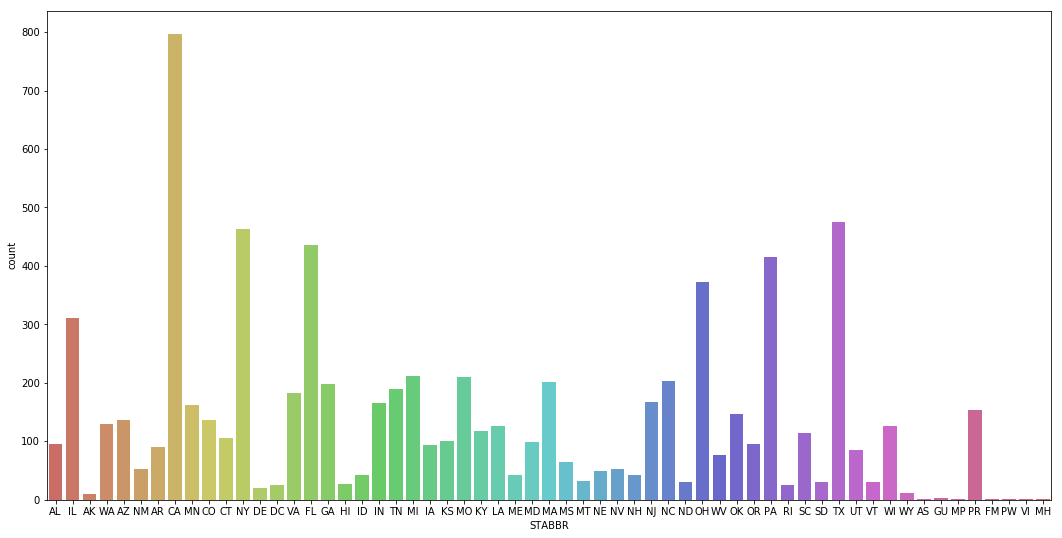

In [90]:
# See how many states are here
plt.figure(figsize=(18,9)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x='STABBR', data=df_12, palette = 'hls')
plt.show()

Based on the data exploration, CA has the most number. VI, MH, AS, FM, MP, PW have the least numbers. 
Therefore when we are extracting samples, we have to think in ratio.

#### Let's select the states with more than 100 respondents

In [107]:
## How can I take values that are more than 100?
states_12 = df_12['STABBR'].value_counts()
states_12 = states_12[states_12.values > 100]

In [92]:
## May be able to plot those stats on the U.S. map using plotly?

In [104]:
list(states_12.index)

['CA',
 'TX',
 'NY',
 'FL',
 'PA',
 'OH',
 'IL',
 'MI',
 'MO',
 'NC',
 'MA',
 'GA',
 'TN',
 'VA',
 'NJ',
 'IN',
 'MN',
 'PR',
 'OK',
 'AZ',
 'CO',
 'WA',
 'WI',
 'LA',
 'KY',
 'SC',
 'CT',
 'KS']

In [ ]:
states

In [108]:
## Select the rows which the state in 'STABBR' occur more than 100 times. 
df_12[df_12['STABBR'].isin(list(states_12.index))]

,UNITID,CITY,STABBR,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,...,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6
43,101958,Elmhurst,IL,2.0,1,2,1,2,3,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,102845,Vancouver,WA,1.0,1,1,1,3,3,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,103644,Phoenix,AZ,2.0,1,2,2,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,103723,Phoenix,AZ,3.0,0,4,3,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,103732,Phoenix,AZ,1.0,1,2,1,1,3,4,...,NaN,NaN,NaN,NaN,12.0,5.0,NaN,NaN,NaN,NaN
72,103741,Tucson,AZ,1.0,1,2,1,1,3,4,...,NaN,NaN,NaN,NaN,12.0,5.0,NaN,NaN,NaN,NaN
73,103778,Glendale,AZ,1.0,1,2,1,4,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,103787,Phoenix,AZ,3.0,1,1,3,3,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,103811,Phoenix,AZ,1.0,1,1,1,1,3,4,...,6940.0,4040.0,NaN,NaN,6.0,2.0,4.0,1.0,NaN,NaN
76,103893,Phoenix,AZ,1.0,1,6,1,3,3,4,...,11201.0,11229.0,9370.0,9692.0,11.0,10.0,10.0,10.0,10.0,10.0


#### Trying Matt's codes on a different y value

In [95]:

cats = []
for i in df_12.columns:
    if df_12[i].dtype == "object":
        try:
            df_12[i] = df_12[i].astype('float64')
        except:
            cats.append(i)